<a href="https://colab.research.google.com/github/rueshi1/oasis_internship/blob/main/Project_2_Proposal_Level_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os, re, glob, math
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from IPython.display import display

In [2]:
from google.colab import files
uploaded = files.upload()      # choose WineQT.csv from your computer

import io, pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['WineQT.csv']))
print(df.shape)
df.head()

Saving WineQT.csv to WineQT.csv
(1143, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
None
                       count        mean         std      min        2

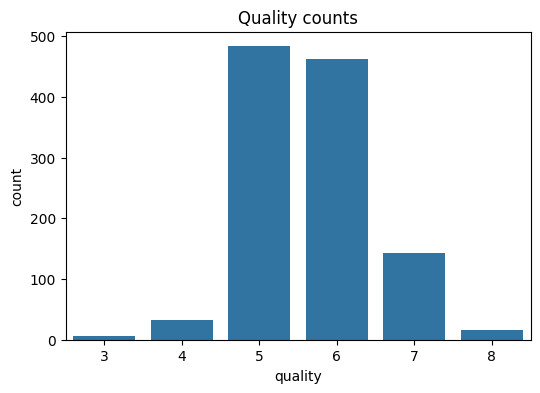

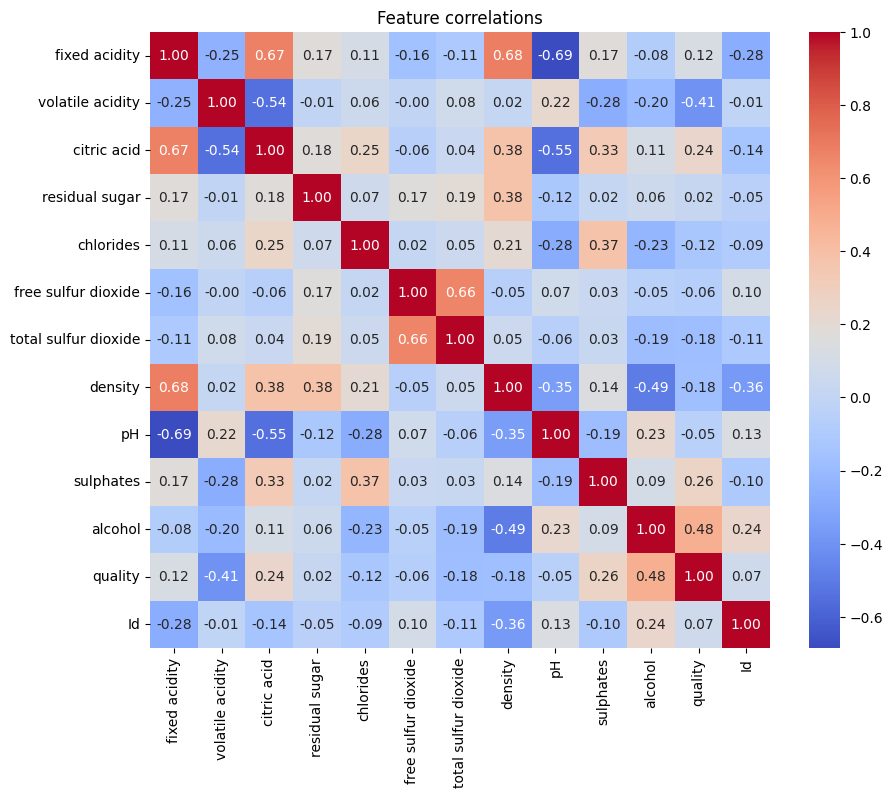

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns


print(df.info())
print(df.describe().T)
print(df.isnull().sum())


# Target distribution
plt.figure(figsize=(6,4))
sns.countplot(x='quality', data=df)
plt.title('Quality counts')
plt.show()


# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature correlations')
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# target
TARGET = 'quality'


# features and target
X = df.drop(columns=[TARGET])
y = df[TARGET]


# optional: create binary target
# y_bin = (y >= 7).astype(int) # 1 = good, 0 = not good


# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# scale numeric features
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [5]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42, k_neighbors=1)
X_res, y_res = sm.fit_resample(X_train_s, y_train)

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


# Linear
lr = LinearRegression()
lr.fit(X_train_s, y_train)
preds_lr = lr.predict(X_test_s)
print('LR RMSE:', np.sqrt(mean_squared_error(y_test, preds_lr)))


# Random Forest
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train) # RF can use unscaled features
preds_rf = rf.predict(X_test)
print('RF RMSE:', np.sqrt(mean_squared_error(y_test, preds_rf)))

LR RMSE: 0.6277472844313372
RF RMSE: 0.6007246352000595


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


# prepare binary target
y_bin_train = (y_train >= 7).astype(int)
y_bin_test = (y_test >= 7).astype(int)


# Logistic
log = LogisticRegression(max_iter=1000, class_weight='balanced')
log.fit(X_train_s, y_bin_train)
p_log = log.predict(X_test_s)
print(classification_report(y_bin_test, p_log))


# RandomForest
rfc = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42)
rfc.fit(X_train, y_bin_train)
p_rfc = rfc.predict(X_test)
print(classification_report(y_bin_test, p_rfc))

              precision    recall  f1-score   support

           0       0.97      0.76      0.85       197
           1       0.36      0.84      0.51        32

    accuracy                           0.77       229
   macro avg       0.67      0.80      0.68       229
weighted avg       0.88      0.77      0.80       229

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       197
           1       0.84      0.50      0.63        32

    accuracy                           0.92       229
   macro avg       0.88      0.74      0.79       229
weighted avg       0.91      0.92      0.91       229



alcohol                 0.208998
volatile acidity        0.123212
citric acid             0.113239
sulphates               0.109083
density                 0.077012
Id                      0.065739
total sulfur dioxide    0.063187
fixed acidity           0.062386
chlorides               0.055323
pH                      0.046800
free sulfur dioxide     0.039035
residual sugar          0.035985
dtype: float64


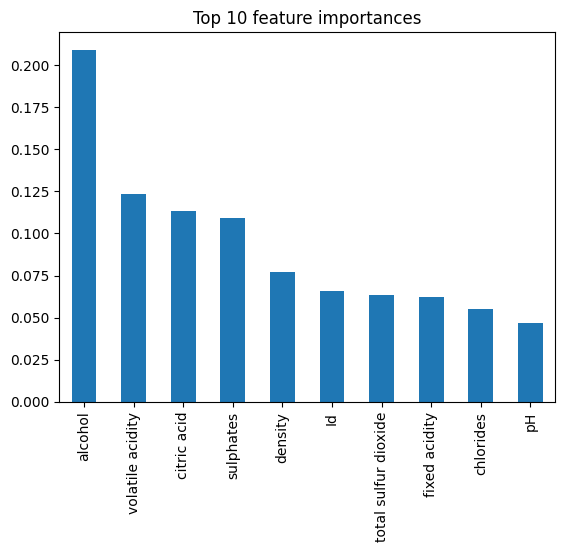

In [8]:
import pandas as pd
fi = pd.Series(rfc.feature_importances_, index=X.columns).sort_values(ascending=False)
print(fi.head(20))
fi.head(10).plot(kind='bar')
plt.title('Top 10 feature importances')
plt.show()

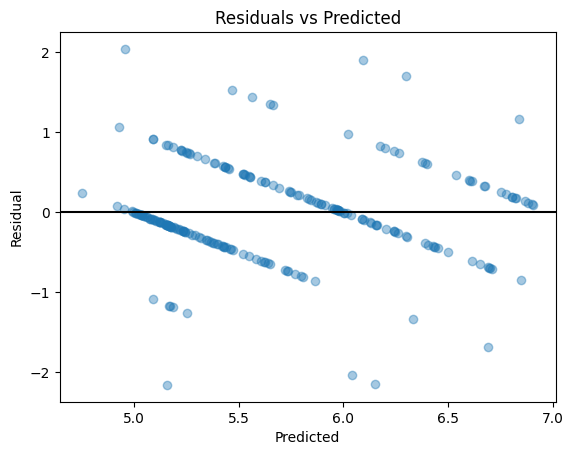

In [9]:
res = y_test - rf.predict(X_test)
plt.scatter(rf.predict(X_test), res, alpha=0.4)
plt.axhline(0, color='k')
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.title('Residuals vs Predicted')
plt.show()

In [10]:
!pip install flask-ngrok